<h2>Poisson problem with random right-hand side</h2>

\begin{align*}
  - \Delta u(x, \omega) = f(x, \omega_1) \hspace{1cm} & \vert \hspace{1cm} x \in D(\omega_2) \\
  u(x, \omega) = 0 \hspace{1cm} & \vert \hspace{1cm} x \in \delta D(\omega_2)
\end{align*}
with
\begin{align*}
  & f: D(\omega_2) \times \Omega_1 \rightarrow \mathbb{R}, \\
  & f(x, \omega_1) = \begin{cases}
      \omega_1^{(1)}, & x_1 \leq 0, x \in D_{ref} \cap D(\omega_2)\\
      \omega_1^{(2)}, & x_1 > 0, x \in D_{ref} \cap D(\omega_2)\\
      0 & \text{otherwise} 
  \end{cases}
\end{align*}
where $\omega_1^{(1)}, \omega_1^{(2)} \sim U([0, 1]).$


In [ ]:
from helpers_rhs_random import *

In [ ]:
# Create random field for plotting
randomFieldV, jacobianV = calculate_vector_field_eigenpairs(10)

In [ ]:
# Sample random field and random right hand side
xi = np.random.uniform(-np.sqrt(3), np.sqrt(3), randomFieldV.J)
F = np.random.random(2)

In [ ]:
"""
Calculate a sample solution of the random right hand side Poisson equation and plot the resulting solution û on the reference domain.
Creation of image: images/5_domain_mapping_method_for_variants_of_the_poisson_equation/rhs_random_u_hat.png
"""

u_sol = solve_poisson_for_given_sample_rhs_random(10, jacobianV, xi, F)

mesh = mshr.generate_mesh(DOMAIN, 10)
x_coords = mesh.coordinates()[:, 0]
y_coords = mesh.coordinates()[:, 1]
grid_x, grid_y = np.mgrid[-1:1:500j, -1:1:500j]
u_sols = []

for i in range(len(x_coords)):
    u_sols.append(u_sol(x_coords[i], y_coords[i]))

grid_z = griddata((x_coords, y_coords), u_sols, (grid_x, grid_y), method='linear')

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
cp = ax.contourf(grid_x, grid_y, grid_z, levels=100, cmap='viridis')
cbar = plt.colorbar(cp)
cbar.ax.tick_params(labelsize=16)
cbar.locator = MaxNLocator(nbins=5)
cbar.update_ticks()
ax.set_xlim([-1.1, 1.1])
ax.set_ylim([-1.1, 1.1])
plt.title(r'$\hat{u}(\hat{x}, \omega)$ on $D_{ref}$', fontsize=24, pad=20)
plt.xlabel(r'$\hat{x}_1$', fontsize=24)
plt.ylabel(r'$\hat{x}_2$', fontsize=24)
ax.xaxis.set_major_locator(MaxNLocator(nbins=5))
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

print(f"F: {F}")

In [ ]:
"""
Calculate a sample solution of the random right hand side Poisson equation and plot the resulting solution u on the sample domain.
Creation of image: images/5_domain_mapping_method_for_variants_of_the_poisson_equation/rhs_random_u.png
"""

u_sol = solve_poisson_for_given_sample_rhs_random(10, jacobianV, xi, F)

mesh = mshr.generate_mesh(DOMAIN, 10)
x_coords = mesh.coordinates()[:, 0]
y_coords = mesh.coordinates()[:, 1]
grid_x, grid_y = np.mgrid[-1.5:1.5:500j, -1.5:1.5:500j]
u_sols = []
x_coords_perturbed = []
y_coords_perturbed = []

for i in range(len(x_coords)):
    P_hat = fe.Point(x_coords[i], y_coords[i])
    x_coords_perturbed.append(randomFieldV(P_hat, xi)[0])
    y_coords_perturbed.append(randomFieldV(P_hat, xi)[1])
    u_sols.append(u_sol(P_hat))


grid_z = griddata((x_coords_perturbed, y_coords_perturbed), u_sols, (grid_x, grid_y), method='linear')

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
cp = ax.contourf(grid_x, grid_y, grid_z, levels=100, cmap='viridis')
cbar = plt.colorbar(cp)
cbar.ax.tick_params(labelsize=16)
cbar.locator = MaxNLocator(nbins=5)
cbar.update_ticks()
ax.set_xlim([np.min(x_coords_perturbed) - 0.1, np.max(x_coords_perturbed) + 0.1])
ax.set_ylim([np.min(y_coords_perturbed) - 0.1, np.max(y_coords_perturbed) + 0.1])
plt.title(r'$u(x, \omega)$ on $D(\omega)$', fontsize=24, pad=20)
plt.xlabel(r'$x_1$', fontsize=24)
plt.ylabel(r'$x_2$', fontsize=24)
ax.xaxis.set_major_locator(MaxNLocator(nbins=5))
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()
print(f"F: {F}")

In [ ]:
"""
Show the random right hand side function for a sample.
Creation of image: images/5_domain_mapping_method_for_variants_of_the_poisson_equation/random_right_hand_side_f.png
"""

# Assuming randomFieldV and jacobianV are already defined
randomFieldV_4, jacobianV_4 = calculate_vector_field_eigenpairs(4)

# used different xi for plot
xi = np.random.uniform(-np.sqrt(6), np.sqrt(6), randomFieldV_4.J)
num_points = 1000
points = []
perturbed_points = []
for i in range(num_points):
    point = np.array([np.cos(2 * np.pi * i / num_points), np.sin(2 * np.pi * i / num_points)])
    points.append(point)
    perturbed_points.append(randomFieldV_4(point, xi))

left_semi_circle = []
right_semi_circle = []
for i in range(num_points):
    if perturbed_points[i][0] < 0:
        if np.linalg.norm(perturbed_points[i]) <= 1:
            left_semi_circle.append(perturbed_points[i])
        else:
            left_semi_circle.append(perturbed_points[i] / np.linalg.norm(perturbed_points[i]))
    else:
        if np.linalg.norm(perturbed_points[i]) <= 1:
            right_semi_circle.append(perturbed_points[i])
        else:
            right_semi_circle.append(perturbed_points[i] / np.linalg.norm(perturbed_points[i]))

# Sort right semi circle points by y coordinate
right_semi_circle = sorted(right_semi_circle, key=lambda x: x[1])

for i in range(num_points):
    left_semi_circle.append(np.array([0, i/num_points]))
    right_semi_circle.append(np.array([0, i/num_points]))
    left_semi_circle.append(np.array([0, - i/num_points]))
    right_semi_circle.append(np.array([0, - i/num_points]))

fig = plt.figure(figsize=(10, 8))

ax = fig.add_subplot(111)
ax.set_aspect('equal', adjustable='datalim')
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])

# Convert perturbed points to a numpy array
points = np.array(points)
perturbed_points = np.array(perturbed_points)
left_semi_circle = np.array(left_semi_circle)
right_semi_circle = np.array(right_semi_circle)


# Fill the space inside the perturbed circle
ax.fill(perturbed_points[:, 0], perturbed_points[:, 1], color='lightcoral', alpha=0.4, label=r'$D(\omega_2)$')
# ax.fill(points[:, 0], points[:, 1], color='red', alpha=0.2, label='Unit circle')
ax.fill(left_semi_circle[:, 0], left_semi_circle[:, 1], color='green', alpha=0.2, label=r'$D_{ref} \cap D(\omega_2), x_1 \leq 0$')
ax.fill(right_semi_circle[:, 0], right_semi_circle[:, 1], color='blue', alpha=0.2, label=r'$D_{ref} \cap D(\omega_2), x_1 > 0$')


ax.text(-0.75, 0, r'$\omega_1^{(1)}$', fontsize=24, ha='center', va='center')
ax.text(0.75, 0, r'$\omega_1^{(2)}$', fontsize=24, ha='center', va='center')

plt.xlabel(r'$x_1$', fontsize=24)
plt.ylabel(r'$x_2$', fontsize=24)
# plt.title('Random right hand side f', fontsize=24, pad=20)
ax.tick_params(axis='both', which='major', labelsize=16)
plt.legend(loc='upper left', fontsize=16)

plt.show()


In [ ]:
"""
Perform Monte Carlo Analysis and plot the resulting approximation-, convergence- and error-plots
Creation of image: images/5_domain_mapping_method_for_variants_of_the_poisson_equation/rhs_random_mean.png
Creation of image: images/5_domain_mapping_method_for_variants_of_the_poisson_equation/rhs_random_mean_convergence.png
Creation of image: images/5_domain_mapping_method_for_variants_of_the_poisson_equation/rhs_random_variance.png
Creation of image: images/5_domain_mapping_method_for_variants_of_the_poisson_equation/rhs_random_variance_convergence.png
Creation of image: images/5_domain_mapping_method_for_variants_of_the_poisson_equation/rhs_random_l2_error.png
Creation of image: images/5_domain_mapping_method_for_variants_of_the_poisson_equation/rhs_random_h1_error.png
"""

poisson_rhs_random_analyse_two_resolutions_from_data_u_hat(resolution_sparse = 10,
                                  resolution_fine = 14,
                                  P_hat = fe.Point(0.2, 0.2))

/Users/elias/git/Masterthesis/poisson_rhs_random/helpers_rhs_random.py:627: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



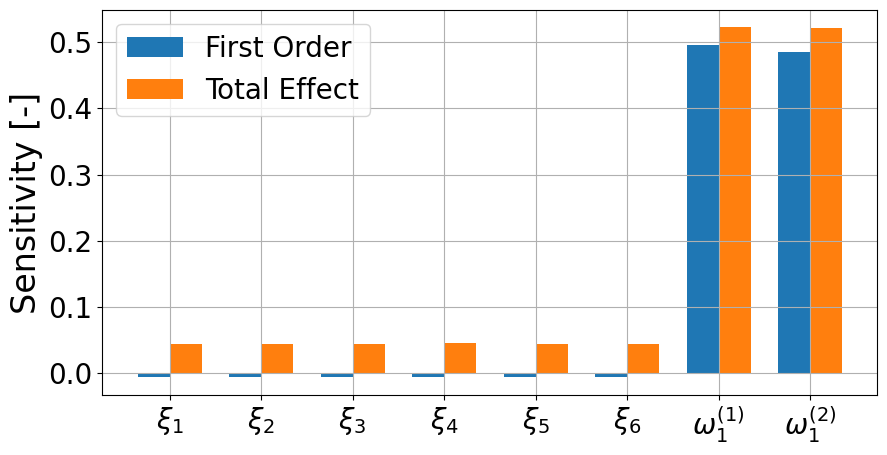

Sample size: 12000


In [ ]:
"""
Show the Sobol Indices of the random right hand side Poisson model.
Creation of image: images/5_domain_mapping_method_for_variants_of_the_poisson_equation/rhs_random_sobols.png
"""

mesh_res = 8
size_of_xi = 6
randomFieldV, jacobianV = calculate_vector_field_eigenpairs(mesh_res)

S_single, S_total, mc_sample_size = poisson_rhs_random_sobol_calc_indices_from_data(fem_res=mesh_res, kl_res=mesh_res,
                                                                         size_of_xi=size_of_xi,
                                                                         randomFieldV=randomFieldV, jacobianV=jacobianV)
poisson_rhs_random_plot_sobols(S_single, S_total, mc_sample_size)